# Importing the depencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Loading the PNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy array
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images

Test data = 10000 images



Image dimension --> 28x28

Grayscale Image --> 1 canal channel

In [5]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


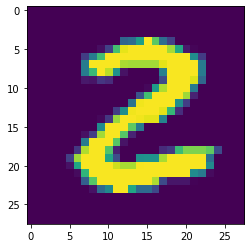

2


In [7]:
# displaing the image 
plt.imshow(X_train[25])
plt.show()

# printing the corres label
print(Y_train[25])

# Image Labels

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique value in Y_train
print(np.unique(Y_train))

# unique value in Y_test
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


 We can use these labels as such or we can also apply One Hot Encoding 

All the images have the same dimensions in this dataset, if not, we have to resize all the images to a common dimension

In [10]:
# Scalling the values 

X_train = X_train/255
X_test = X_test/255

# Build the Neural Network

In [11]:
# setting up the layers of the Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')])

In [12]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# training the Neural Network
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9788


 Training data accuracy = 98.9



**Accuracy in test data:**

In [14]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9704


Test data accuracy = 97.0

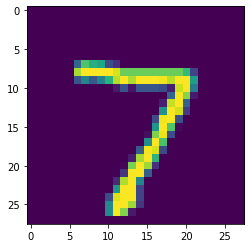

In [15]:
# first data point in X_test 
plt.imshow(X_test[0])
plt.show()

In [16]:
print(Y_test[0])

7


In [17]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [18]:
print(Y_pred.shape)

(10000, 10)


In [19]:
print(Y_pred[0])

[1.20940804e-01 1.92644879e-01 8.97625268e-01 8.17901194e-01
 9.24641907e-04 2.01301323e-03 2.21359478e-05 9.99989033e-01
 7.95484781e-02 3.27318400e-01]


model.predict() gives the prediciton probality of each flass for that data point

In [20]:
# converting the prediction probabilites to class labels

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [21]:
# converting the prediction probablities to class label for all test data 
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 3, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 3, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 5, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [22]:
Y_test_labels = [np.argmax(i) for i in Y_test]
print(Y_test_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Confusion Matrix

In [23]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)


tf.Tensor(
[[ 973    1    0    0    0    2    1    1    2    0]
 [   0 1120    5    2    0    1    3    1    3    0]
 [   7    0 1009    0    4    0    4    4    4    0]
 [   0    0    5  984    0    7    0    4    5    5]
 [   1    1    4    0  961    0    8    0    3    4]
 [   4    2    0   20    2  836   10    1   15    2]
 [   7    3    0    1    2    1  940    0    4    0]
 [   3    6   12    4    2    0    1  995    4    1]
 [   7    2    3    3    4    2    5    5  940    3]
 [   6    6    0    8   23    3    3    7    7  946]], shape=(10, 10), dtype=int32)


Text(114.0, 0.5, 'True Labels')

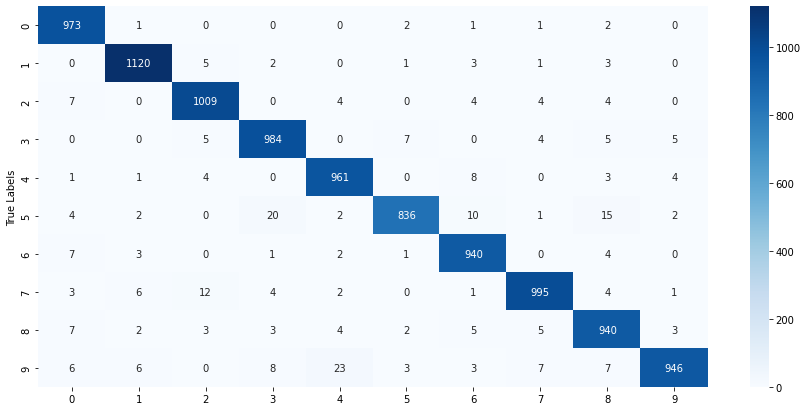

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')

# Build a Predictiv system

In [25]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [26]:
type(input_image)

NoneType

In [27]:
input_image.shape

AttributeError: ignored

In [ ]:
cv2_imshow(input_image)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)

In [ ]:
print(input_prediction)

In [ ]:
input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

# Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resized = input_image_resize/255

image_reshaped = np.reshape(input_image_resized, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_prediction_label = np.argmax(input_prediction)

print('The Hadwirtten Digit is recognised as ', input_prediction_label)